In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
%matplotlib inline

In [354]:
df = pd.read_csv('data/daily_temp/1980_Present_zip38732.csv')

In [355]:
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
0,USC00221738,"CLEVELAND, MS US",33.7367,-90.7445,42.1,1980-01-01,NaN,NaN,0.0,0.0,0.0,53.0,31.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00221738,"CLEVELAND, MS US",33.7367,-90.7445,42.1,1980-01-02,NaN,NaN,0.0,0.0,0.0,58.0,31.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00221738,"CLEVELAND, MS US",33.7367,-90.7445,42.1,1980-01-03,NaN,NaN,0.0,0.0,0.0,48.0,37.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00221738,"CLEVELAND, MS US",33.7367,-90.7445,42.1,1980-01-04,NaN,NaN,0.3,0.0,0.0,39.0,30.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00221738,"CLEVELAND, MS US",33.7367,-90.7445,42.1,1980-01-05,NaN,NaN,0.0,0.0,0.0,46.0,26.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN


In [356]:
df.fillna(0, inplace=True)

In [357]:
df["DATE"] = pd.to_datetime(df["DATE"])
#df["DATE"].dt.year
df.set_index("DATE", inplace=True)

In [358]:
df_indexed = df.sort_index()
#df_indexed["TMAX"] = df_indexed["TMAX"]
df_17to19 = df_indexed.loc["2017-01-01":]
#df_17to19.drop(["WT01", "WT03", "WT04", "WT05", "WT06", "WT11"], inplace=True)
df_17to19.drop(["LATITUDE", "LONGITUDE", "ELEVATION", "SNOW", "SNWD", "DAPR", "MDPR", "PRCP", "WT01", "WT03", "WT04", "WT05", "WT06", "WT11"], axis=1, inplace=True)

In [359]:
df_17to19["GDD"] = (df_17to19["TMAX"]+df_17to19["TMIN"])/2 - 50
df_17to19.head(20)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,STATION,NAME,TMAX,TMIN,TOBS,GDD
DATE,,,,,,
2017-01-01,USC00221738,"CLEVELAND, MS US",56.0,44.0,50.0,0.0
2017-01-02,USC00221738,"CLEVELAND, MS US",64.0,50.0,61.0,7.0
2017-01-03,USC00221738,"CLEVELAND, MS US",63.0,55.0,55.0,9.0
2017-01-04,USC00221738,"CLEVELAND, MS US",63.0,34.0,34.0,-1.5
2017-01-05,USC00221738,"CLEVELAND, MS US",41.0,31.0,34.0,-14.0
2017-01-06,USC00221738,"CLEVELAND, MS US",38.0,24.0,24.0,-19.0
2017-01-07,USC00221738,"CLEVELAND, MS US",26.0,15.0,16.0,-29.5
2017-01-08,USC00221738,"CLEVELAND, MS US",27.0,15.0,16.0,-29.0
2017-01-09,USC00221738,"CLEVELAND, MS US",32.0,16.0,24.0,-26.0


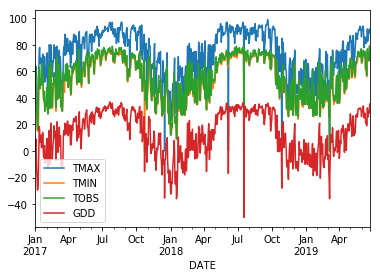

In [360]:
#fig = plt.figure()
#plt.plot(df_17to19.index, df_17to19["TMAX"])
#plt.
fig = df_17to19.plot()
#plt.plot(df_17to19.index, df_17to19["TMAX"])
#plt.

In [361]:
# get past 5 years GDD
df_reduced = df_indexed.drop(["STATION", "LATITUDE", "LONGITUDE", "ELEVATION", "SNOW", "SNWD", "DAPR", "MDPR", "WT01", "WT03", "WT04", "WT05", "WT06", "WT11", "TOBS"], axis=1)

In [362]:
df_reduced.sort_values(by=['TMAX'], ascending=False).head()
#type(df_reduced["TMAX"][0])
#df_reduced["TMAX"].values

,NAME,PRCP,TMAX,TMIN
DATE,,,,
2010-08-04,"CLEVELAND, MS US",0.0,106.0,80.0
2011-08-04,"CLEVELAND, MS US",0.0,106.0,80.0
2011-08-05,"CLEVELAND, MS US",0.0,106.0,79.0
1986-07-30,"CLEVELAND, MS US",0.0,106.0,76.0
2000-08-31,"CLEVELAND 3 N, MS US",0.0,106.0,74.0


In [363]:
df_reduced["TMAX"] = df_reduced["TMAX"].mask(df_reduced["TMAX"] > 86, 86)

In [364]:
df_reduced.sort_values(by=['TMAX'], ascending=False).head()

,NAME,PRCP,TMAX,TMIN
DATE,,,,
2019-06-23,"CLEVELAND, MS US",0.0,86.0,79.0
1996-07-02,"CLEVELAND 3 N, MS US",0.0,86.0,74.0
1996-07-14,"CLEVELAND 3 N, MS US",0.0,86.0,72.0
1996-07-13,"CLEVELAND 3 N, MS US",0.0,86.0,74.0
1996-07-12,"CLEVELAND 3 N, MS US",0.0,86.0,69.0


In [365]:
df_reduced["GDD"] = (df_reduced["TMAX"]+df_reduced["TMIN"])/2 - 50
df_reduced.head()

,NAME,PRCP,TMAX,TMIN,GDD
DATE,,,,,
1980-01-01,"CLEVELAND, MS US",0.0,53.0,31.0,-8.0
1980-01-02,"CLEVELAND, MS US",0.0,58.0,31.0,-5.5
1980-01-03,"CLEVELAND, MS US",0.0,48.0,37.0,-7.5
1980-01-04,"CLEVELAND, MS US",0.3,39.0,30.0,-15.5
1980-01-05,"CLEVELAND, MS US",0.0,46.0,26.0,-14.0


In [366]:
df_reduced["GDD"] = df_reduced["GDD"].mask(df_reduced["GDD"] < 0, 0)
df_reduced.head()

,NAME,PRCP,TMAX,TMIN,GDD
DATE,,,,,
1980-01-01,"CLEVELAND, MS US",0.0,53.0,31.0,0.0
1980-01-02,"CLEVELAND, MS US",0.0,58.0,31.0,0.0
1980-01-03,"CLEVELAND, MS US",0.0,48.0,37.0,0.0
1980-01-04,"CLEVELAND, MS US",0.3,39.0,30.0,0.0
1980-01-05,"CLEVELAND, MS US",0.0,46.0,26.0,0.0


In [367]:
def gdd_by_year(df, year):
    start = str(year) + "-01-01"
    end = str(year) + "-12-31"
    df = df.loc[start:end]
    return df

In [368]:
gdd_by_year(df_reduced, 1981).tail()

,NAME,PRCP,TMAX,TMIN,GDD
DATE,,,,,
1981-12-27,"CLEVELAND, MS US",0.11,54.0,32.0,0.0
1981-12-28,"CLEVELAND, MS US",0.00,62.0,46.0,4.0
1981-12-29,"CLEVELAND, MS US",0.00,50.0,30.0,0.0
1981-12-30,"CLEVELAND, MS US",0.00,44.0,26.0,0.0
1981-12-31,"CLEVELAND, MS US",0.41,51.0,40.0,0.0


In [369]:
df_inter = df_reduced.copy(deep = True)
df_inter.head()

,NAME,PRCP,TMAX,TMIN,GDD
DATE,,,,,
1980-01-01,"CLEVELAND, MS US",0.0,53.0,31.0,0.0
1980-01-02,"CLEVELAND, MS US",0.0,58.0,31.0,0.0
1980-01-03,"CLEVELAND, MS US",0.0,48.0,37.0,0.0
1980-01-04,"CLEVELAND, MS US",0.3,39.0,30.0,0.0
1980-01-05,"CLEVELAND, MS US",0.0,46.0,26.0,0.0


In [370]:
df_reduced["AVGT"] = (df_reduced["TMAX"]+df_reduced["TMIN"])/2
df_reduced.drop(["TMAX","TMIN"], axis=1, inplace=True)

In [416]:
df_rolling = df_reduced.copy(deep = True)
df_rolling["GDD"] = df_rolling["GDD"].rolling(window = 14, min_periods = 14).mean()
df_rolling["AVGT"] = df_rolling["AVGT"].rolling(window = 14, min_periods = 14).mean()
df_rolling.fillna(0, inplace=True)
df_rolling.head()

,NAME,PRCP,GDD,AVGT
DATE,,,,
1980-01-01,"CLEVELAND, MS US",0.0,0.0,0.0
1980-01-02,"CLEVELAND, MS US",0.0,0.0,0.0
1980-01-03,"CLEVELAND, MS US",0.0,0.0,0.0
1980-01-04,"CLEVELAND, MS US",0.3,0.0,0.0
1980-01-05,"CLEVELAND, MS US",0.0,0.0,0.0


In [417]:
df_normalized = df_rolling.copy(deep = True)
#df_normalized["TMAX"] = df_normalized["TMAX"]/df_normalized["TMAX"].iloc[0]
#df_normalized["TMIN"] = df_normalized["TMIN"]/df_normalized["TMIN"].iloc[0]

In [419]:
# get last five years + current ytd
df14 = gdd_by_year(df_normalized, 2014)
df15 = gdd_by_year(df_normalized, 2015)
df16 = gdd_by_year(df_normalized, 2016)
df17 = gdd_by_year(df_normalized, 2017)
df18 = gdd_by_year(df_normalized, 2018)
df19 = gdd_by_year(df_normalized, 2019)

In [374]:
def plot_year(df):
    plt.figure()
    df.plot()

<Figure size 432x288 with 0 Axes>

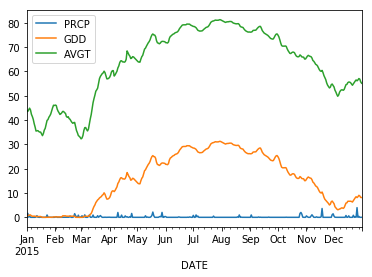

In [375]:
plot_year(df15)

In [376]:
def plot_year_secondary(df):    
    plt.figure()
    df.AVGT.plot(x_compat=True)
    df.GDD.plot(secondary_y=True, x_compat=True, style='g')

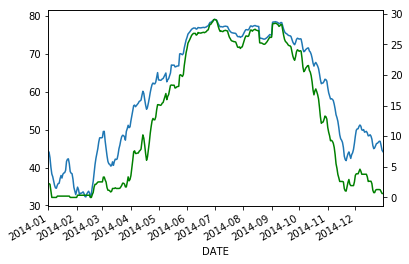

In [377]:
plot_year_secondary(df14)

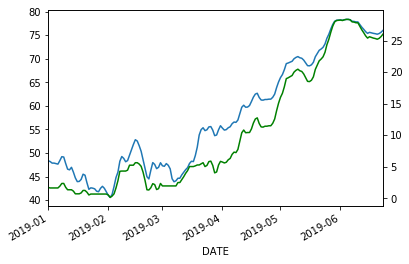

In [378]:
plot_year_secondary(df19)

In [379]:
def plot_year_side(df1, df2):
    plt.figure()
    df1.AVGT.plot(x_compat=True, style='b')
    df1.GDD.plot(x_compat=True, style='r')
    df2.AVGT.plot(x_compat=True, style='b')
    df2.GDD.plot(x_compat=True, style='r')
    plt.axvspan('2014-10', '2014-11', alpha=0.5, color='g')

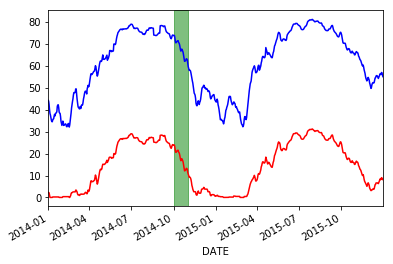

In [380]:
plot_year_side(df14, df15)

In [381]:
# get first date occurrence where GDD >= 15
# get last data occurence where GDD >= 15
df14.GDD

DATE
2014-01-01    2.250000
2014-01-02    2.250000
2014-01-03    2.142857
2014-01-04    1.071429
2014-01-05    0.000000
2014-01-06    0.000000
2014-01-07    0.000000
2014-01-08    0.000000
2014-01-09    0.000000
2014-01-10    0.000000
2014-01-11    0.214286
2014-01-12    0.214286
2014-01-13    0.214286
2014-01-14    0.214286
2014-01-15    0.214286
2014-01-16    0.214286
2014-01-17    0.214286
2014-01-18    0.214286
2014-01-19    0.214286
2014-01-20    0.214286
2014-01-21    0.214286
2014-01-22    0.214286
2014-01-23    0.214286
2014-01-24    0.214286
2014-01-25    0.000000
2014-01-26    0.000000
2014-01-27    0.000000
2014-01-28    0.000000
2014-01-29    0.000000
2014-01-30    0.000000
                ...   
2014-12-02    3.857143
2014-12-03    3.857143
2014-12-04    3.857143
2014-12-05    4.250000
2014-12-06    4.607143
2014-12-07    4.285714
2014-12-08    3.785714
2014-12-09    3.785714
2014-12-10    3.785714
2014-12-11    3.785714
2014-12-12    3.785714
2014-12-13    3.785714
2014-1

In [382]:
def plot_year_secondary2(df1, df2):    
    plt.figure()
    df1.AVGT.plot(x_compat=True, style='b')
    df1.GDD.plot(secondary_y=True, x_compat=True, style='g')
    df2.AVGT.plot(x_compat=True, style='b')
    df2.GDD.plot(secondary_y=True, x_compat=True, style='g')

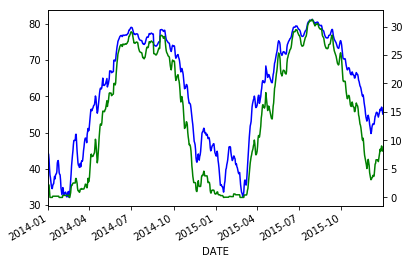

In [383]:
plot_year_secondary2(df14, df15)

In [408]:
df_bymonth = df_normalized.copy(deep = True)
# remove 19 data
df_bymonth = df_bymonth[:'2018-12-31']
df_bymonth = df_bymonth.resample('M').mean()

In [ ]:
# TODO: for each df year, rename columns as name+year, group by month
# combine all dfs by using only month as index and vertical stack of all columns...